<a href="https://colab.research.google.com/github/ggarci10/refactored-meme/blob/main/final_project_twitch_game_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/Twitch_game_data%202016-2019.csv")
df.head()


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [3]:
goty = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/the_game_awards.csv")



In [4]:
goty2016 = goty[goty['year'] == 2016]
goty2017 = goty[goty['year'] == 2017]
goty2018 = goty[goty['year'] == 2018]
goty2016 = goty2016.reset_index(drop=True)
goty2017 = goty2016.reset_index(drop=True)
goty2018 = goty2016.reset_index(drop=True)
goty2016.head()

,year,category,nominee,company,winner,voted
0,2016,Game of the Year,Overwatch,Blizzard Entertainment,1,jury
1,2016,Game of the Year,Doom,id Software,0,jury
2,2016,Game of the Year,Inside,Playdead,0,jury
3,2016,Game of the Year,Titanfall 2,Respawn Entertainment,0,jury
4,2016,Game of the Year,Uncharted 4: A Thief's End,Naughty Dog,0,jury


In [5]:
mask2016 = df['Year'] == 2016

df_2016 = pd.DataFrame(df[mask2016])

# print(df_new)
grouped2016  = df_2016.groupby("Game")
# sum and average the other information by game
#Game	Month	Year	Hours_watched total	Hours_streamed	Peak_viewers	Peak_channels	Streamers	Avg_viewers	Avg_channels	Avg_viewer_ratio
result2016 = grouped2016.agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2016.head()

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
60 Seconds!,60 Seconds!,1151013,2065,56904,30,365.333333,450.17
7 Days to Die,7 Days to Die,6639960,190266,36862,950,6969.333333,22.23
ABZ<U+00DB>,ABZ<U+00DB>,338342,5738,28205,116,2587.000000,58.97
APB Reloaded,APB Reloaded,277614,10747,17386,37,1073.000000,25.83
ARAYA,ARAYA,142823,437,28289,12,184.000000,326.83


In [6]:
mask2017 = df['Year'] == 2017

df_2017 = pd.DataFrame(df[mask2017])

# print(df_new)

grouped2017  = df_2017.groupby("Game")
# sum and average the other information by game

result2017  = grouped2017 .agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2017.head()


,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
.hack//G.U. Last Recode,.hack//G.U. Last Recode,145350,35258,1222,258,3174.000000,4.12
60 Seconds!,60 Seconds!,623520,679,31311,10,242.666667,388.04
7 Days to Die,7 Days to Die,8305182,94377,39478,266,7016.916667,20.49
<U+014C>kami,<U+014C>kami,181539,19273,29429,148,3305.000000,9.42
A Hat in Time,A Hat in Time,709295,20147,28625,182,2232.500000,32.64


In [7]:
mask2018 = df['Year'] == 2018

df_2018 = pd.DataFrame(df[mask2018])

# print(df_new)

grouped2018  = df_2018.groupby("Game")
# sum and average the other information by game

result2018  = grouped2018.agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2018

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
60 Parsecs!,60 Parsecs!,529688,1867,31960,27,606.000000,283.71
60 Seconds!,60 Seconds!,222209,871,18245,8,414.000000,255.12
7 Days to Die,7 Days to Die,6897693,80431,25079,293,5587.000000,15.99
A Hat in Time,A Hat in Time,286598,14520,8015,182,3065.000000,19.74
A Way Out,A Way Out,6505470,89705,233484,1587,17175.000000,60.46
...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,13886280,119368,136561,675,11250.250000,25.09
"Zero Escape: Nine Hours, Nine Persons, Nine Doors","Zero Escape: Nine Hours, Nine Persons, Nine Doors",197213,661,7155,7,62.000000,298.36
iRacing,iRacing,1483730,21577,6547,217,1549.833333,17.16


In [8]:
check=goty2016['nominee']
game=result2016['Game']
len(check)
game

Game
60 Seconds!                                            60 Seconds!
7 Days to Die                                        7 Days to Die
ABZ<U+00DB>                                            ABZ<U+00DB>
APB Reloaded                                          APB Reloaded
ARAYA                                                        ARAYA
                                                ...               
Z1: Battle Royale                                Z1: Battle Royale
Zelda II: The Adventure of Link    Zelda II: The Adventure of Link
Zero Escape: Zero Time Dilemma      Zero Escape: Zero Time Dilemma
iRacing                                                    iRacing
osu!                                                          osu!
Name: Game, Length: 620, dtype: object

In [9]:
len(check)
check


0                             Overwatch
1                                  Doom
2                                Inside
3                           Titanfall 2
4            Uncharted 4: A Thief's End
                     ...               
114    Counter-Strike: Global Offensive
115                              Dota 2
116                   League of Legends
117                    Street Fighter V
118                        Hideo Kojima
Name: nominee, Length: 119, dtype: object

In [10]:
len(game)

620

In [11]:




# Create a new column. For example, a column of NaNs
result2016['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2016)):
  number=0
  for y in range(len(goty2016)):
    if(result2016['Game'][x]==goty2016['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2016['ifnominated'][x]='yes'
  else:
    result2016['ifnominated'][x]='no'







# Create a new column. For example, a column of NaNs
result2017['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2017)):
  number=0
  for y in range(len(goty2017)):
    if(result2017['Game'][x]==goty2017['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2017['ifnominated'][x]='yes'
  else:
    result2017['ifnominated'][x]='no'







# Create a new column. For example, a column of NaNs
result2018['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2018)):
  number=0
  for y in range(len(goty2018)):
    if(result2018['Game'][x]==goty2018['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2018['ifnominated'][x]='yes'
  else:
    result2018['ifnominated'][x]='no'














<ipython-input-11-2b064d52f934>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  result2016['ifnominated'] = pd.np.nan
<ipython-input-11-2b064d52f934>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2016['ifnominated'][x]='no'
<ipython-input-11-2b064d52f934>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  result2017['ifnominated'] = pd.np.nan
<ipython-input-11-2b064d52f934>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result201

In [12]:
result2016

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
60 Seconds!,60 Seconds!,1151013,2065,56904,30,365.333333,450.17,no
7 Days to Die,7 Days to Die,6639960,190266,36862,950,6969.333333,22.23,no
ABZ<U+00DB>,ABZ<U+00DB>,338342,5738,28205,116,2587.000000,58.97,no
APB Reloaded,APB Reloaded,277614,10747,17386,37,1073.000000,25.83,no
ARAYA,ARAYA,142823,437,28289,12,184.000000,326.83,no
...,...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,87872183,370148,84161,882,15932.500000,50.44,no
Zelda II: The Adventure of Link,Zelda II: The Adventure of Link,181560,747,94715,12,100.000000,243.05,no
Zero Escape: Zero Time Dilemma,Zero Escape: Zero Time Dilemma,321911,3755,17601,27,401.000000,85.73,no


In [13]:
result2017

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
.hack//G.U. Last Recode,.hack//G.U. Last Recode,145350,35258,1222,258,3174.000000,4.12,no
60 Seconds!,60 Seconds!,623520,679,31311,10,242.666667,388.04,no
7 Days to Die,7 Days to Die,8305182,94377,39478,266,7016.916667,20.49,no
<U+014C>kami,<U+014C>kami,181539,19273,29429,148,3305.000000,9.42,no
A Hat in Time,A Hat in Time,709295,20147,28625,182,2232.500000,32.64,no
...,...,...,...,...,...,...,...,...
Yu-Gi-Oh! Duel Links,Yu-Gi-Oh! Duel Links,1879042,13456,22914,52,877.750000,44.26,no
Z1: Battle Royale,Z1: Battle Royale,89752462,482900,145097,1184,28988.166667,42.24,no
iRacing,iRacing,139492,11507,1638,131,1025.000000,12.12,no


In [14]:

result2018

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
60 Parsecs!,60 Parsecs!,529688,1867,31960,27,606.000000,283.71,no
60 Seconds!,60 Seconds!,222209,871,18245,8,414.000000,255.12,no
7 Days to Die,7 Days to Die,6897693,80431,25079,293,5587.000000,15.99,no
A Hat in Time,A Hat in Time,286598,14520,8015,182,3065.000000,19.74,no
A Way Out,A Way Out,6505470,89705,233484,1587,17175.000000,60.46,no
...,...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,13886280,119368,136561,675,11250.250000,25.09,no
"Zero Escape: Nine Hours, Nine Persons, Nine Doors","Zero Escape: Nine Hours, Nine Persons, Nine Doors",197213,661,7155,7,62.000000,298.36,no
iRacing,iRacing,1483730,21577,6547,217,1549.833333,17.16,no


Yes count: 30
No count: 590


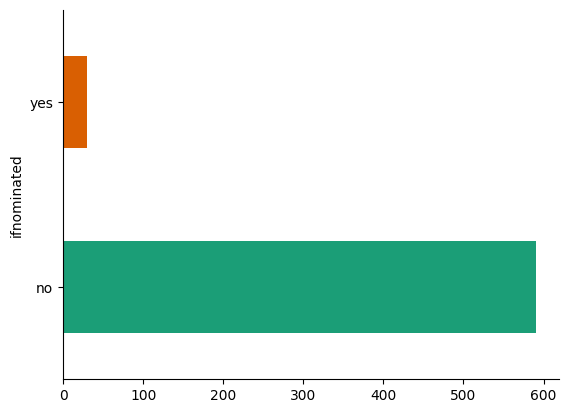

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
result2016.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2016['ifnominated'].value_counts()['yes']
no_count = result2016['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)


Yes count: 23
No count: 574


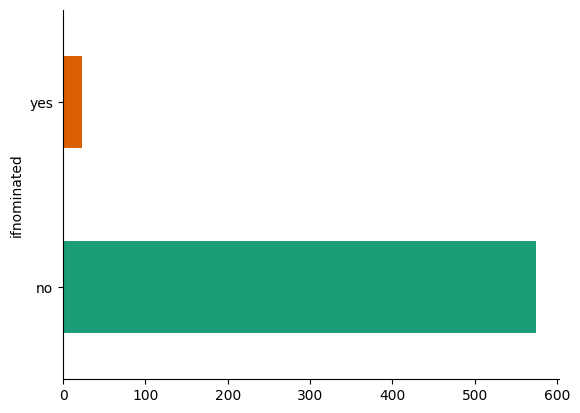

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
result2017.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2017['ifnominated'].value_counts()['yes']
no_count = result2017['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)

Yes count: 15
No count: 571


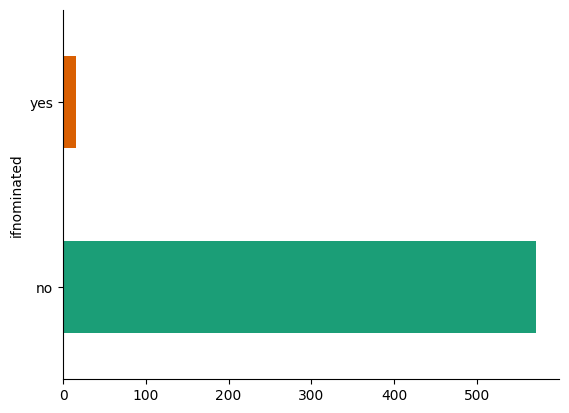

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
result2018.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2018['ifnominated'].value_counts()['yes']
no_count = result2018['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)

In [18]:

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [134]:
feature_cols = ['Hours_watched','Hours_streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewer_ratio']
feature_cols1 = ['Hours_watched']
feature_cols2 = ['Hours_streamed']
feature_cols3 = ['Peak_channels']



In [140]:
X = result2016[feature_cols1]
# X_createdTest= result2017[feature_cols]
# Y_createdTest= result2017['ifnominated']
X1= result2016[feature_cols1]
X2=result2016[feature_cols2]
X3=result2016[feature_cols3]

In [138]:
y=result2016['ifnominated']


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.6, random_state=10)
#print(y_test)
print(X_train)

                                      Hours_watched
Game                                               
Gears of War 4                              4570995
The Political Machine 2016                   195613
Jak and Daxter: The Precursor Legacy         170642
ARK: Survival Evolved                      15137028
Elite: Dangerous                            1438592
...                                             ...
Pinball                                      188826
Monster Hunter Generations                  1104972
The Forest                                  1900932
Dishonored 2                                2540883
LEGO Star Wars: The Force Awakens             96608

[248 rows x 1 columns]


In [142]:
#this is used with 3 classifiers
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg)
print(round(logregaccuracy, 2))




# using only one  peak channels
my_logreg1 = LogisticRegression()
my_logreg1.fit(X_train1,y_train1)
y_predict_logreg=my_logreg1.predict(X_test1)
logregaccuracy=accuracy_score(y_test1,y_predict_logreg)
print(round(logregaccuracy, 2))
# it increases its accuracy by using peak channel



0.95
0.95


In [143]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_lr2016 = my_logreg.predict_proba(X_test)

In [144]:
from sklearn import metrics

fprlogreg2016, tprlogreg2016, thresholdslogreg2016 = metrics.roc_curve(y_test, y_predict_prob_lr2016[:,1], pos_label='yes')

print(fprlogreg2016)
print(tprlogreg2016)
AUClogreg2016 = metrics.auc(fprlogreg2016, tprlogreg2016)
print(AUClogreg2016)

[0.         0.0028169  0.61690141 0.61690141 0.69014085 0.69014085
 0.71549296 0.71549296 0.71830986 0.71830986 0.83661972 0.83661972
 0.89577465 0.89577465 0.90985915 0.90985915 0.92676056 0.92676056
 0.93521127 0.93521127 0.94647887 0.94647887 0.96056338 0.96056338
 0.96619718 0.96619718 0.97183099 0.97183099 0.9971831  0.9971831
 1.         1.        ]
[0.         0.         0.         0.05882353 0.05882353 0.11764706
 0.11764706 0.17647059 0.17647059 0.23529412 0.23529412 0.29411765
 0.29411765 0.35294118 0.35294118 0.41176471 0.41176471 0.47058824
 0.47058824 0.58823529 0.58823529 0.64705882 0.64705882 0.70588235
 0.70588235 0.76470588 0.76470588 0.82352941 0.82352941 0.88235294
 0.88235294 1.        ]
0.11632145816072909


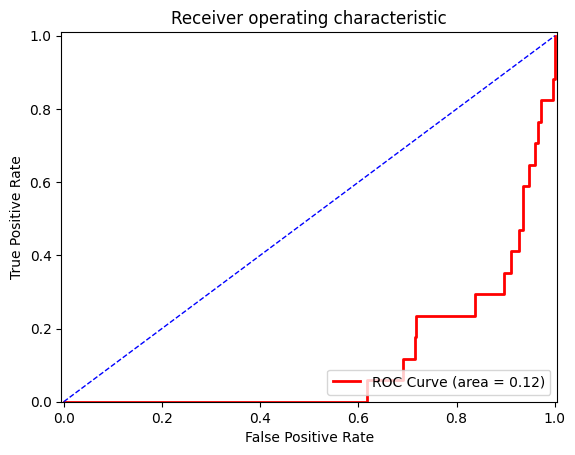

In [145]:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
# plt.plot(fprlogreg2016, tprlogreg2016, color='red', lw=2,
#          label='ROC Curve (area = %0.2f)' % AUClogreg2016)

# # Random Guess line:
# plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# # Defining The Range of X-Axis and Y-Axis:
# plt.xlim([-0.005, 1.005])
# plt.ylim([0.0, 1.01])

# # Labels, Title, Legend:
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")

# plt.show()

In [151]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt=my_decisiontree.predict(X_test)
mdtaccuracy= accuracy_score(y_test,y_predict_mdt)
print(round(mdtaccuracy,2))
# Predicting the Binary Label:
y_predict_mdt2016 = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_mdt2016 = my_decisiontree.predict_proba(X_test)

0.92


[0.         0.04225352 1.        ]
[0.         0.11764706 1.        ]
0.5376967688483845


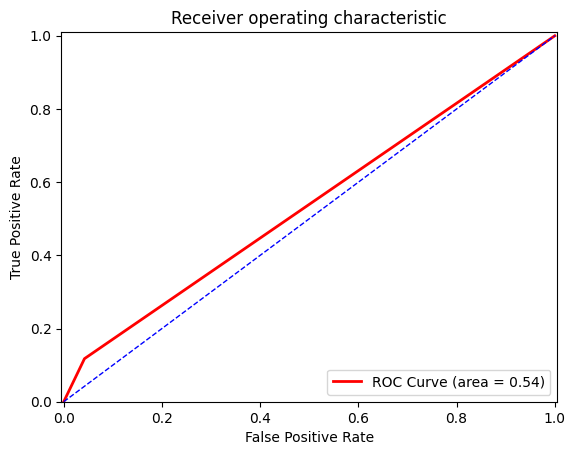

In [152]:
fprmdt2016, tprmdt2016, thresholdsmdt2016 = metrics.roc_curve(y_test, y_predict_prob_mdt2016[:,1], pos_label='yes')

print(fprmdt2016)
print(tprmdt2016)
AUCmdt2016 = metrics.auc(fprmdt2016, tprmdt2016)
print(AUCmdt2016)

%matplotlib inline

plt.figure()

# Roc Curve:
# plt.plot(fprmdt2016, tprmdt2016, color='red', lw=2,
#          label='ROC Curve (area = %0.2f)' % AUCmdt2016)

# # Random Guess line:
# plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# # Defining The Range of X-Axis and Y-Axis:
# plt.xlim([-0.005, 1.005])
# plt.ylim([0.0, 1.01])

# # Labels, Title, Legend:
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")

# plt.show()

In [153]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn)

print(round(knnaccuracy,2))

0.95


In [154]:
y_predict_knn = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_knn2016 = knn.predict_proba(X_test)

[0.         0.06760563 0.21126761 0.27042254 0.46197183 0.97464789
 1.        ]
[0.         0.11764706 0.76470588 0.82352941 1.         1.
 1.        ]
0.8270091135045567


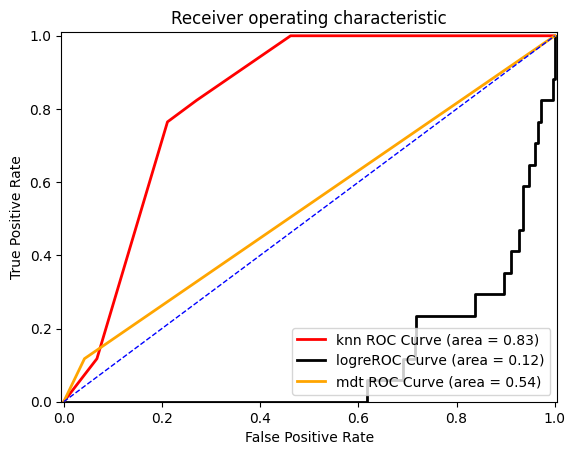

In [158]:
fpr2016knn, tpr2016knn, thresholds2016knn = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label='yes')

print(fpr2016knn)
print(tpr2016knn)
AUC2016knn = metrics.auc(fpr2016knn, tpr2016knn)
print(AUC2016knn)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr2016knn, tpr2016knn, color='red', lw=2,label='knn ROC Curve (area = %0.2f)' % AUC2016knn)
plt.plot(fprlogreg2016, tprlogreg2016, color='black', lw=2,label='logreROC Curve (area = %0.2f)' % AUClogreg2016)


plt.plot(fprmdt2016, tprmdt2016, color='orange', lw=2, label='mdt ROC Curve (area = %0.2f)' % AUCmdt2016)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()